<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#LGBM-training" data-toc-modified-id="LGBM-training-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>LGBM training</a></span><ul class="toc-item"><li><span><a href="#utility" data-toc-modified-id="utility-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>utility</a></span></li><li><span><a href="#hit_type" data-toc-modified-id="hit_type-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>hit_type</a></span></li></ul></li></ul></div>

In [1]:
import sys
sys.path.append('..')

In [2]:
from taiko.profile import *
from taiko.database import *

import lightgbm as lgb
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import multiprocessing

Using TensorFlow backend.


In [3]:
pd.DataFrame(data={
    'drummer_name': get_all_drummers()
})

,drummer_name
0,aaaaa
1,carolyn
2,cuxi
3,fatfat
4,eve
5,oliver
6,chris
7,sheep
8,howeverover
9,celiven


In [4]:
create_all_drummer_profiles()

100%|██████████| 12/12 [00:00<00:00, 154.36it/s]


In [5]:
pfs = []
with multiprocessing.Pool() as p:
    drummers = get_all_drummers()
    for id_, pf in tqdm(enumerate(p.imap(get_profile, drummers)), total=len(drummers)):
        pf['who'] = id_
        pfs.append(pf)
        
pf = pd.concat(pfs, ignore_index=True)
# pf['hit_type'] = pf['hit_type'].transform(transform_hit_type)
pf

100%|██████████| 12/12 [00:00<00:00, 292.92it/s]


,L_A_AI,L_G_AI,L_AX_AI,L_AY_AI,L_AZ_AI,L_GX_AI,L_GY_AI,L_GZ_AI,L_A_MMI,L_G_MMI,...,R_GY_FR,R_GZ_FR,R_AXY_CORR,R_AYZ_CORR,R_AZX_CORR,R_GXY_CORR,R_GYZ_CORR,R_GZX_CORR,hit_type,who
0,3.9196,9.9703,0.2581,3.8780,0.4838,3.1659,8.9862,2.3813,3.9171,10.2170,...,20.9962,15.9058,-0.6891,0.9129,-0.8665,0.8937,0.3618,0.7337,1,0
1,3.9354,19.9558,0.1987,3.8566,0.7505,3.4732,19.5136,2.1423,3.9586,20.1486,...,60.0159,13.2568,-0.5423,-0.3646,-0.4120,0.9831,0.9211,0.8842,1,0
2,4.1026,16.3195,-0.0576,4.0697,0.4915,4.9680,15.1480,1.8515,4.1402,15.6393,...,53.4668,49.2676,-0.9816,0.8613,-0.7726,0.9375,0.8315,0.9704,1,0
3,3.9445,9.7605,0.2170,3.9030,0.4758,4.9661,7.3013,-3.1287,3.9600,9.2397,...,81.6192,118.2435,-0.7083,0.1154,0.1799,-0.0566,-0.7340,0.7189,1,0
4,3.8189,13.3349,-0.0063,3.7220,0.8044,5.7028,11.6675,0.0339,3.9210,12.8972,...,193.6889,293.2647,0.0586,0.8145,-0.4415,0.8869,-0.6183,-0.2538,1,0
5,4.0179,22.2902,-0.1786,3.9550,0.5176,10.7428,18.5233,1.5427,4.2147,22.7620,...,576.7029,158.5388,-0.2154,-0.4614,-0.3273,0.9609,0.4454,0.5399,1,0
6,4.2607,11.7713,-0.2154,4.2478,0.0422,8.2455,-5.3855,3.1818,4.2653,11.8209,...,295.6726,126.7090,0.8006,0.8052,0.5336,0.9279,-0.7404,-0.5168,1,0
7,3.7029,25.3201,-0.1316,3.6572,0.0519,11.2137,22.0929,1.1401,3.6260,27.6049,...,185.1349,196.6644,0.8130,0.2957,-0.2793,0.7781,-0.0919,0.4755,1,0
8,4.4370,11.9522,-0.3740,4.3869,-0.3139,4.3478,2.7243,9.4531,4.5348,12.0456,...,236.0595,191.2171,0.1485,0.5936,-0.4742,0.7172,-0.3371,0.3766,1,0
9,3.4562,19.9014,0.1083,3.4089,0.0751,-0.6272,19.3909,2.8577,3.4890,21.6824,...,420.8832,327.1698,0.2011,0.4254,-0.3972,0.8978,-0.3868,-0.0276,1,0


# LGBM training

## utility

In [6]:
def my_f1_score(y_pred, y):
    y = y.get_label()
    y_pred = y_pred.reshape(len(np.unique(y)), -1).argmax(axis=0)
    return "f1-score", metrics.f1_score(y, y_pred, average="macro"), True

In [7]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [8]:
def cutstom_output_cnf_matrix(y, pred_y):
    cnf_matrix = confusion_matrix(y, pred_y)
    
    # Plot normalized confusion matrix
    plt.figure(figsize=(10, 10))
    plot_confusion_matrix(cnf_matrix, classes=[0, 1, 2, 3, 4, 5], normalize=True,
                          title='Normalized confusion matrix')
    plt.show()

## hit_type

In [9]:
train_df = pf.drop('who', axis=1).copy()

x = train_df.drop(['hit_type'], axis=1)
y = train_df['hit_type']

# train / valid / test = 0.4 / 0.4 / 0.2
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size=0.2, stratify=y)
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, random_state=0, test_size=0.5, stratify=y_train)

y_train

3203    4
6521    1
4856    5
5526    5
2153    7
5670    1
1304    3
352     4
3558    1
3036    2
3097    3
2786    0
620     2
1247    2
131     6
4379    2
4821    5
3514    1
4310    2
577     1
6760    4
2620    5
5612    0
3266    5
6772    4
2604    5
5275    2
6957    6
5815    2
1869    4
       ..
2689    6
3909    6
6673    3
4521    3
6219    6
2144    7
1079    7
2637    5
5472    5
3352    6
2830    7
3176    4
1549    1
374     5
5998    4
3676    3
3929    6
1978    6
4836    5
4358    2
6533    1
268     2
5489    5
6335    0
380     5
540     1
2002    6
6862    5
5633    1
5664    1
Name: hit_type, Length: 2864, dtype: int64

In [10]:
train_set = lgb.Dataset(x_train, y_train)
valid_set = lgb.Dataset(x_valid, y_valid, free_raw_data=False)
watchlist = [valid_set]

params = dict({
    'learning_rate': 0.2,
    'application': 'multiclass',
    'num_classes': 8,
#     'min_data_in_leaf': 3,
    'max_depth': 8,
    'num_leaves': 2 ** 8,
    'verbosity': 0
#     'metric': 'multi_logloss'
})

grid_params = {
    'learning_rate': [0.1, 0.2],
    'max_depth': [8, 10],
}

model = lgb.train(params, train_set=train_set, valid_sets=watchlist,
                  num_boost_round=500, verbose_eval=5, early_stopping_rounds=100, feval=my_f1_score)
y_pred = model.predict(x_test, num_iteration=model.best_iteration)

Training until validation scores don't improve for 100 rounds.
[5]	valid_0's f1-score: 0.803141
[10]	valid_0's f1-score: 0.835367
[15]	valid_0's f1-score: 0.855014
[20]	valid_0's f1-score: 0.860899
[25]	valid_0's f1-score: 0.869928
[30]	valid_0's f1-score: 0.879011
[35]	valid_0's f1-score: 0.884018
[40]	valid_0's f1-score: 0.884188
[45]	valid_0's f1-score: 0.884025
[50]	valid_0's f1-score: 0.888773
[55]	valid_0's f1-score: 0.889833
[60]	valid_0's f1-score: 0.893755
[65]	valid_0's f1-score: 0.894858
[70]	valid_0's f1-score: 0.898565
[75]	valid_0's f1-score: 0.901532
[80]	valid_0's f1-score: 0.900572
[85]	valid_0's f1-score: 0.90199
[90]	valid_0's f1-score: 0.901324
[95]	valid_0's f1-score: 0.901962
[100]	valid_0's f1-score: 0.901811
[105]	valid_0's f1-score: 0.902617
[110]	valid_0's f1-score: 0.901568
[115]	valid_0's f1-score: 0.901554
[120]	valid_0's f1-score: 0.902294
[125]	valid_0's f1-score: 0.903542
[130]	valid_0's f1-score: 0.90415
[135]	valid_0's f1-score: 0.90418
[140]	valid_0's

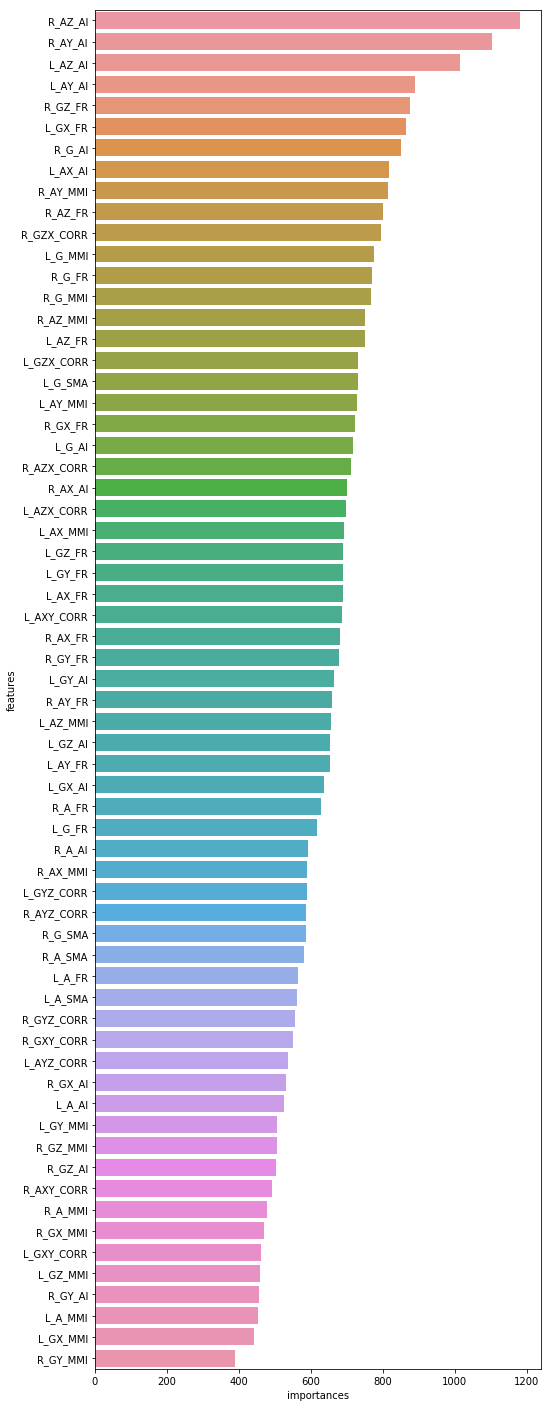

In [11]:
plot_df = pd.DataFrame({'features': train_df.columns[train_df.columns != 'hit_type'],
                        'importances': model.feature_importance()})
plot_df = plot_df.sort_values('importances', ascending=False)

plt.figure(figsize=(8, 25))
sns.barplot(x = plot_df.importances, y = plot_df.features)
plt.show()

In [12]:
y_preds = []
for y_pred_ in [y_pred]:
    predictions = []
    for x in y_pred_:
        predictions.append(np.argmax(x))
    y_preds.append(pd.Series(data=predictions))

Normalized confusion matrix
[[0.93162393 0.         0.00854701 0.         0.00854701 0.03418803
  0.01709402 0.        ]
 [0.         0.91099476 0.0052356  0.06282723 0.         0.0104712
  0.0104712  0.        ]
 [0.01578947 0.00526316 0.92105263 0.         0.03157895 0.02105263
  0.00526316 0.        ]
 [0.         0.06770833 0.00520833 0.91145833 0.00520833 0.00520833
  0.00520833 0.        ]
 [0.01570681 0.         0.03141361 0.         0.91623037 0.01570681
  0.02094241 0.        ]
 [0.01554404 0.         0.00518135 0.         0.         0.92227979
  0.04145078 0.01554404]
 [0.         0.         0.         0.         0.         0.07772021
  0.91709845 0.00518135]
 [0.01204819 0.         0.0060241  0.         0.01204819 0.05421687
  0.02409639 0.89156627]]


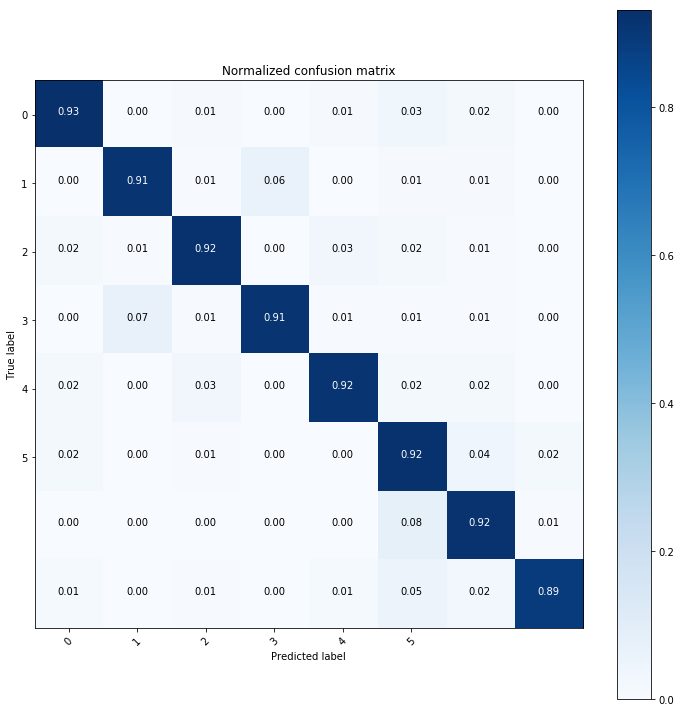

             precision    recall  f1-score   support

          0       0.91      0.93      0.92       117
          1       0.93      0.91      0.92       191
          2       0.94      0.92      0.93       190
          3       0.94      0.91      0.92       192
          4       0.95      0.92      0.93       191
          5       0.82      0.92      0.87       193
          6       0.89      0.92      0.90       193
          7       0.97      0.89      0.93       166

avg / total       0.92      0.91      0.92      1433

0.9159395610145347


In [13]:
y_tests = [y_test]
for y_pre, y_tst in zip(y_preds, y_tests):
    cutstom_output_cnf_matrix(y_tst, y_pre)
    print(metrics.classification_report(y_tst, y_pre))
    
    print(metrics.f1_score(y_tst, y_pre, average = 'macro'))

In [14]:
model.save_model('lgbm_model.h5')